## **Ex. No.14 - Train and Evaluate an SVM Model to Classify Diabetes using Patient Data**
---
Niranjana A

220301061

III BME - "A"

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Impute missing values (if any) with mean, median, or other strategies
# For example, to replace missing values in 'Glucose' with the mean:
df.fillna(df['Glucose'].mean(), inplace=True)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')

# Train the model using the training data
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7597402597402597
Precision: 0.6666666666666666
Recall: 0.6545454545454545
F1-Score: 0.6605504587155964
Confusion Matrix:
 [[81 18]
 [19 36]]


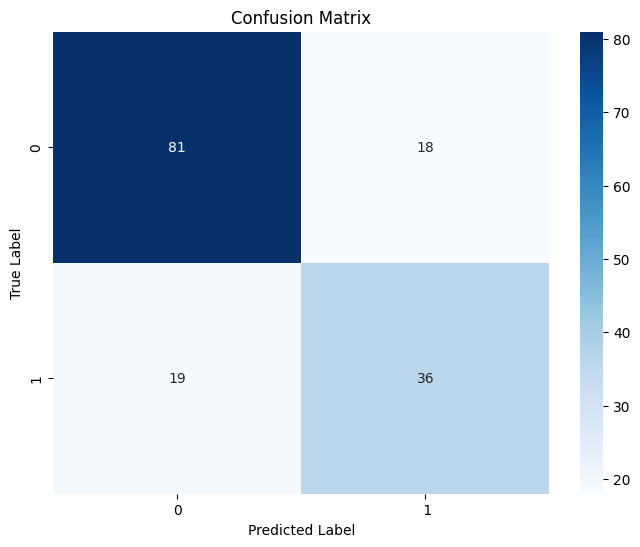

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['0', ' 1'],
            yticklabels=['0', '1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()